In [15]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# 1. Time/Spatial Information in a Fourier Spectrum

In [2]:
# a)
images = np.load('images.npz')
bottle = images['bottle']
helmet = images['helmet']

bottle_fft = np.fft.fft2(bottle)
helmet_fft = np.fft.fft2(helmet)

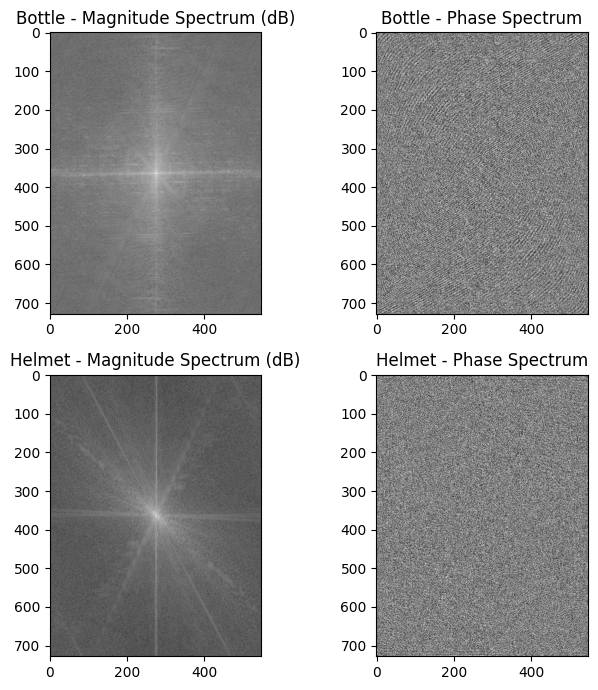

In [29]:
# b)
bottle_magnitude = np.abs(bottle_fft)
bottle_phase = np.angle(bottle_fft)
helmet_magnitude = np.abs(helmet_fft)
helmet_phase = np.angle(helmet_fft)

bottle_magnitude_shifted = np.fft.fftshift(bottle_magnitude)
helmet_magnitude_shifted = np.fft.fftshift(helmet_magnitude)

bottle_magnitude_dB = 20 * np.log10(bottle_magnitude_shifted)
helmet_magnitude_dB = 20 * np.log10(helmet_magnitude_shifted)

fig, axes = plt.subplots(2, 2, figsize=(7, 7))

axes[0, 0].imshow(bottle_magnitude_dB, cmap='gray')
axes[0, 0].set_title('Bottle - Magnitude Spectrum (dB)')

axes[0, 1].imshow(bottle_phase, cmap='gray')
axes[0, 1].set_title('Bottle - Phase Spectrum')

axes[1, 0].imshow(helmet_magnitude_dB, cmap='gray')
axes[1, 0].set_title('Helmet - Magnitude Spectrum (dB)')

axes[1, 1].imshow(helmet_phase, cmap='gray')
axes[1, 1].set_title('Helmet - Phase Spectrum')

plt.tight_layout()
plt.show()

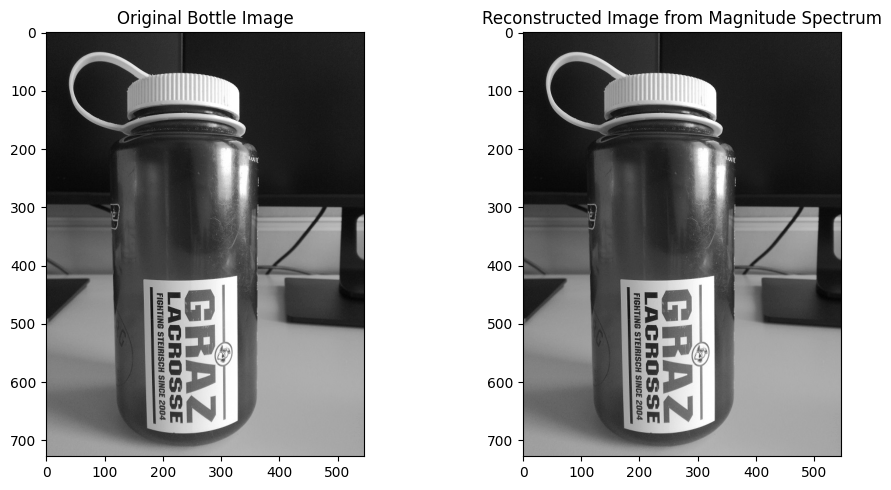

In [31]:
# c)
bottle_magnitude = np.abs(bottle_fft)
reconstructed_image = np.fft.ifft2(bottle_magnitude*np.exp(1j*bottle_phase)).real

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bottle, cmap='gray')
plt.title('Original Bottle Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image from Magnitude Spectrum')

plt.tight_layout()
plt.show()

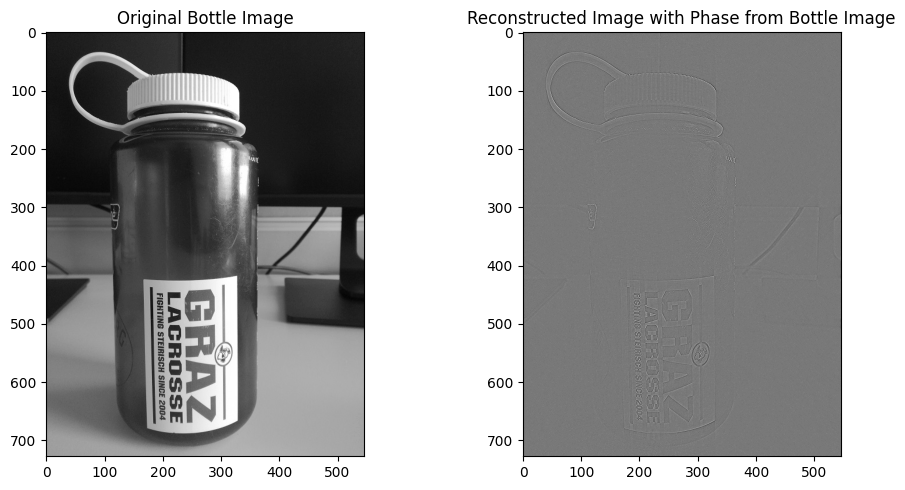

In [21]:
# d)
magnitude = np.ones_like(bottle)
phase = np.angle(bottle_fft)

complex_spectrum = magnitude * np.exp(1j * phase)
reconstructed_image = np.fft.ifft2(complex_spectrum).real

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bottle, cmap='gray')
plt.title('Original Bottle Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image with Phase from Bottle Image')

plt.tight_layout()
plt.show()

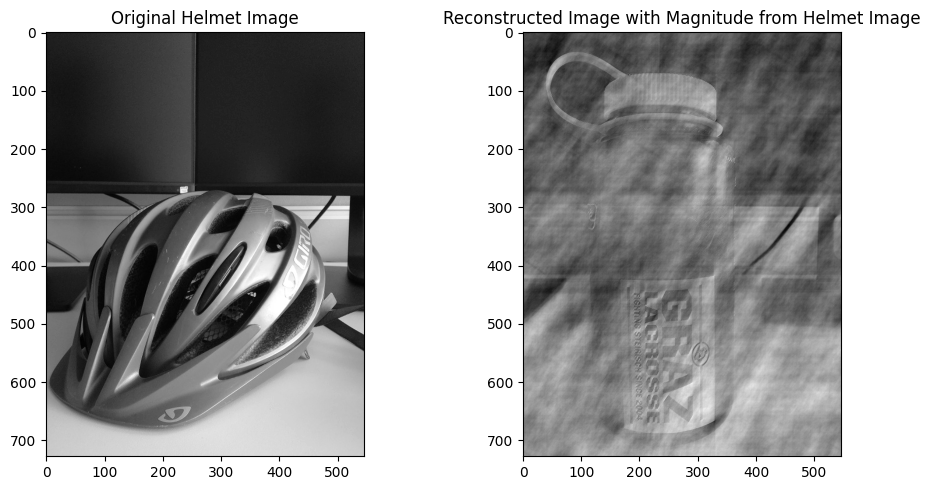

In [7]:
# e)
magnitude = np.abs(helmet_fft)
phase = np.angle(bottle_fft)

complex_spectrum = magnitude * np.exp(1j * phase)

reconstructed_image = np.fft.ifft2(complex_spectrum).real

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(helmet, cmap='gray')
plt.title('Original Helmet Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image with Magnitude from Helmet Image')

plt.tight_layout()
plt.show()

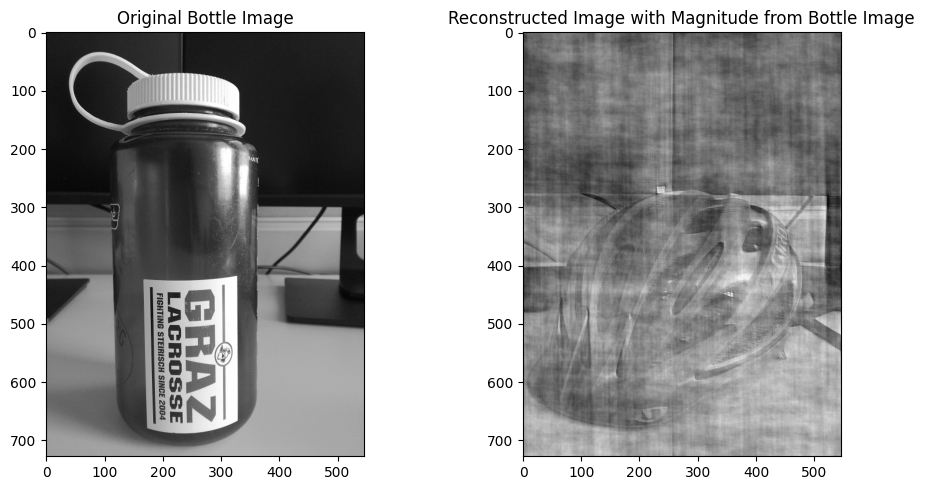

In [8]:
# f)
magnitude = np.abs(bottle_fft)
phase = np.angle(helmet_fft)

complex_spectrum = magnitude * np.exp(1j * phase)

reconstructed_image = np.fft.ifft2(complex_spectrum).real

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bottle, cmap='gray')
plt.title('Original Bottle Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image with Magnitude from Bottle Image')

plt.tight_layout()
plt.show()

# 2. Short Time Fourier Transform

In [32]:
from scipy.signal import stft
fs = 100
data = np.load('signal_stft_exercise.npz')
time_vector = data['time_vector']
signal_vector = data['signal_vector']

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:2017: UserWarning: nperseg = 1024 is greater than input length  = 700, using nperseg = 700
  warnings.warn('nperseg = {0:d} is greater than input length '


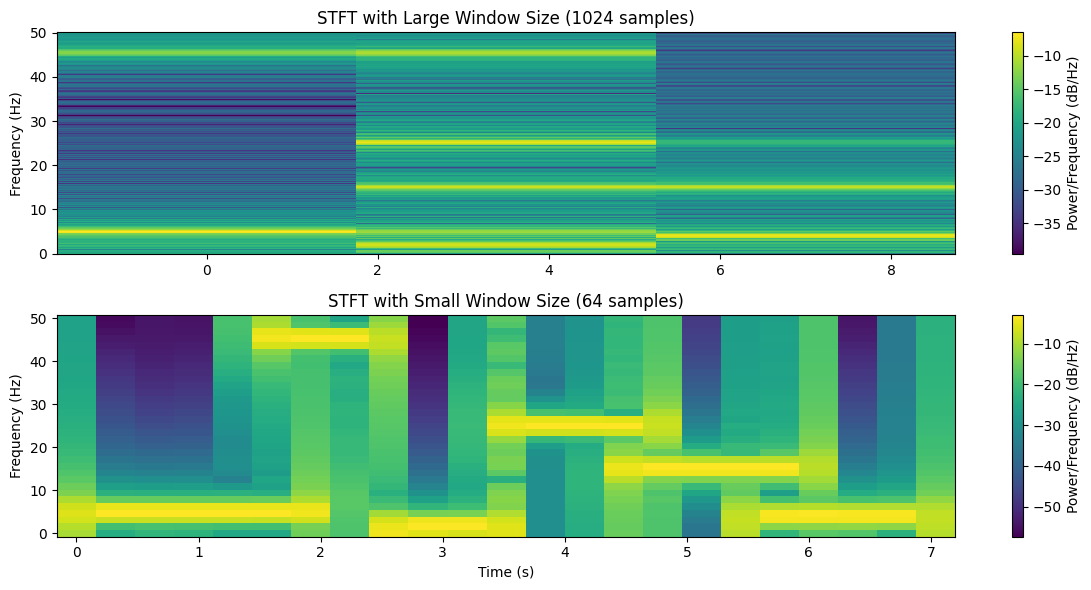

In [33]:
# a)
large_window_size = 1024
small_window_size = 64

frequencies_large, times_large, Z_large = stft(signal_vector, fs=fs, nperseg = large_window_size)
frequencies_small, times_small, Z_small = stft(signal_vector, fs=fs, nperseg = small_window_size)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title(f'STFT with Large Window Size ({large_window_size} samples)')
plt.pcolormesh(times_large, frequencies_large, 10 * np.log10(np.abs(Z_large)), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
plt.title(f'STFT with Small Window Size ({small_window_size} samples)')
plt.pcolormesh(times_small, frequencies_small, 10 * np.log10(np.abs(Z_small)), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()


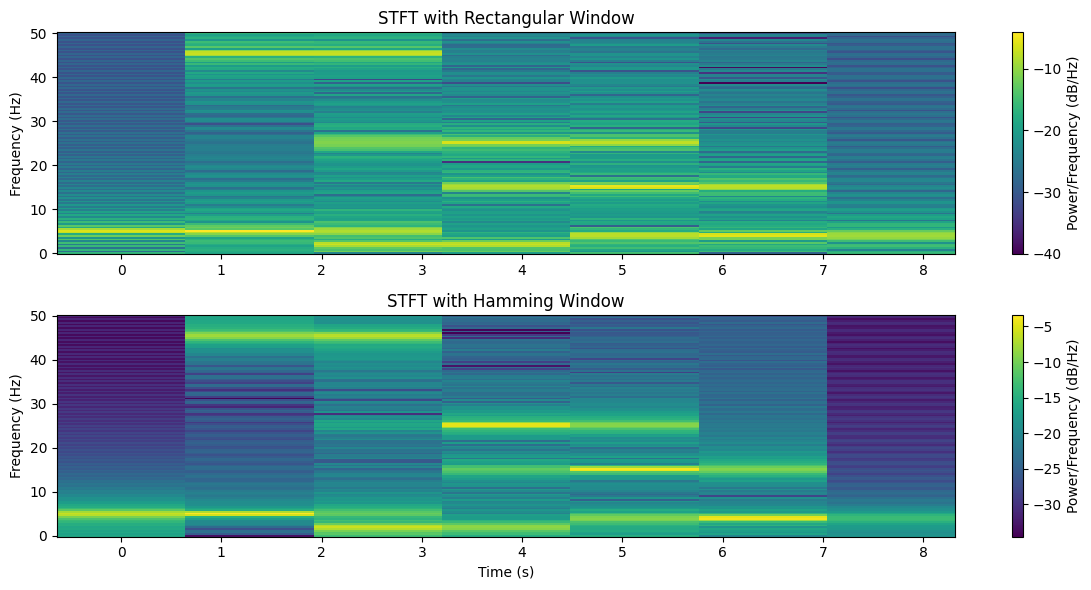

In [36]:
# b)
frequencies_rect, times_rect, Z_rect = stft(signal_vector, fs=fs, window='boxcar')

frequencies_hamming, times_hamming, Z_hamming = stft(signal_vector, fs=fs, window='hamming')

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title('STFT with Rectangular Window')
plt.pcolormesh(times_rect, frequencies_rect, 10 * np.log10(np.abs(Z_rect)), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
plt.title('STFT with Hamming Window')
plt.pcolormesh(times_hamming, frequencies_hamming, 10 * np.log10(np.abs(Z_hamming)), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()

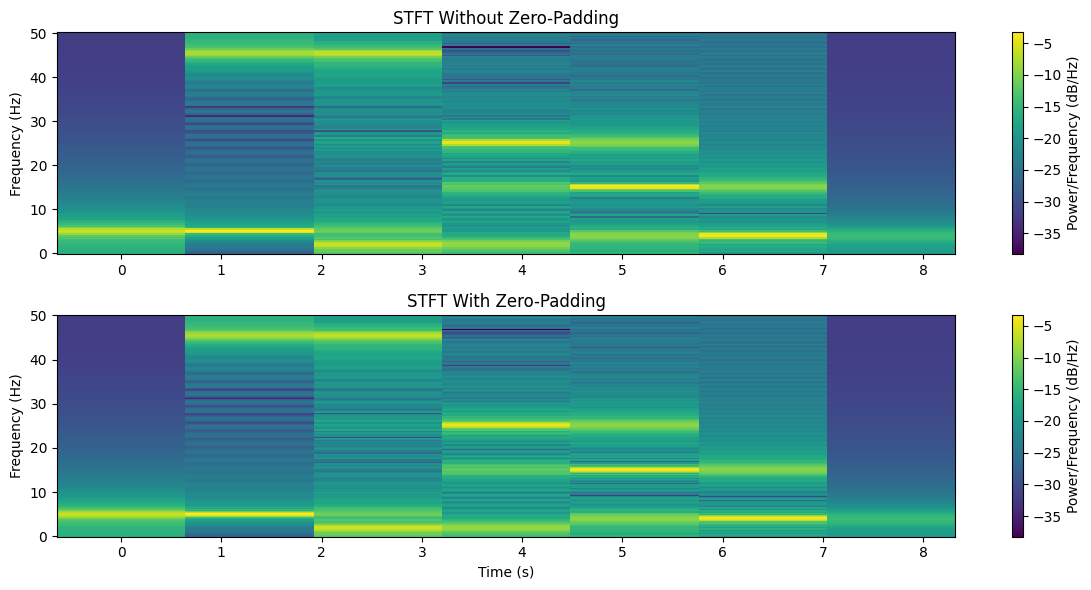

In [12]:
# c)
frequencies_nozp, times_nozp, Z_nozp = stft(signal_vector, fs=fs, noverlap=None, nfft=None, boundary='zeros')
window_size = 256
nfft_with_zp = 2 * window_size
frequencies_with_zp, times_with_zp, Z_with_zp = stft(signal_vector, fs=fs, nfft=nfft_with_zp,  boundary='zeros')

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title('STFT Without Zero-Padding')
plt.pcolormesh(times_nozp, frequencies_nozp, 10 * np.log10(np.abs(Z_nozp)), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
plt.title('STFT With Zero-Padding')
plt.pcolormesh(times_with_zp, frequencies_with_zp, 10 * np.log10(np.abs(Z_with_zp)), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()

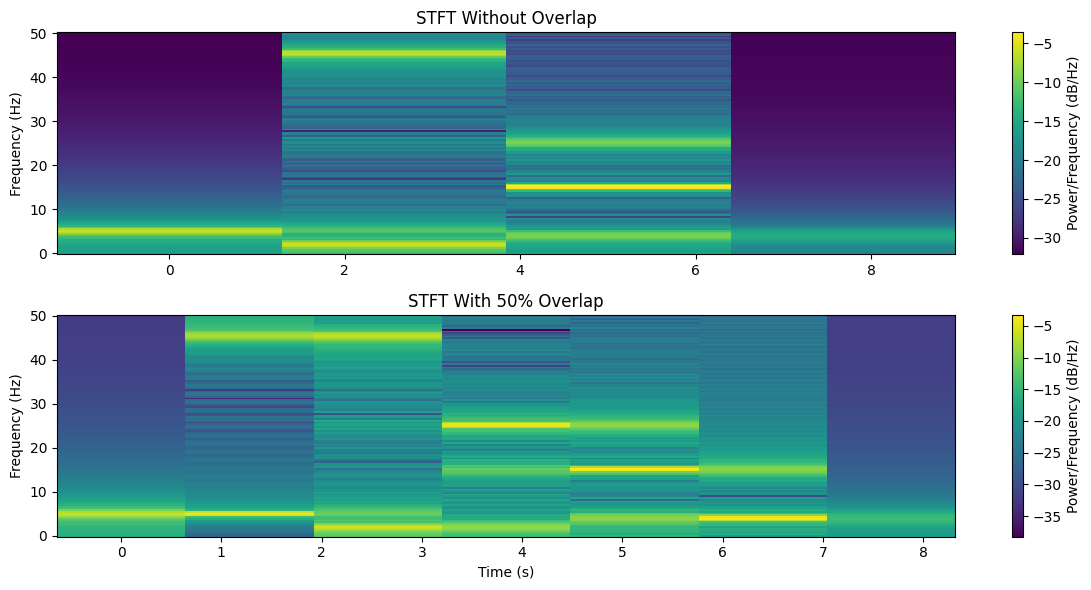

In [13]:
# d)
frequencies_no_overlap, times_no_overlap, Z_no_overlap = stft(signal_vector, fs=fs, nperseg=window_size, noverlap=0)

overlap_percent = 50
overlap_samples = int(window_size * (overlap_percent / 100))
frequencies_max_overlap, times_max_overlap, Z_max_overlap = stft(signal_vector, fs=fs, nperseg=window_size, noverlap=overlap_samples)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title('STFT Without Overlap')
plt.pcolormesh(times_no_overlap, frequencies_no_overlap, 10 * np.log10(np.abs(Z_no_overlap)), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
plt.title(f'STFT With {overlap_percent}% Overlap')
plt.pcolormesh(times_max_overlap, frequencies_max_overlap, 10 * np.log10(np.abs(Z_max_overlap)), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()